In [2]:
##Importing all the required libraries
!pip install xgboost
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
# pre-processing:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing.data import QuantileTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import statistics

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.preprocessing.data module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.preprocessing. Anything that cannot be imported from sklearn.preprocessing is now part of the private API.
  warnings.warn(message, FutureWarning)


# Importing data And Preprocessing

In [3]:
os.getcwd()

'C:\\Users\\nitin\\Downloads\\Neha Singh DSP aaignment-3 OCT 17 2020'

In [4]:
os.chdir(r"C:\Users\nitin\OneDrive\Desktop\.ipynb_checkpoints") 

In [5]:
train__csv = pd.read_csv("train_values.csv")
label_csv = pd.read_csv("train_labels.csv")
print(train__csv.shape)
print(label_csv.shape)

(260601, 39)
(260601, 2)


In [6]:
train__csv.head(2)

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,0


In [7]:
train__csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 39 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   building_id                             260601 non-null  int64 
 1   geo_level_1_id                          260601 non-null  int64 
 2   geo_level_2_id                          260601 non-null  int64 
 3   geo_level_3_id                          260601 non-null  int64 
 4   count_floors_pre_eq                     260601 non-null  int64 
 5   age                                     260601 non-null  int64 
 6   area_percentage                         260601 non-null  int64 
 7   height_percentage                       260601 non-null  int64 
 8   land_surface_condition                  260601 non-null  object
 9   foundation_type                         260601 non-null  object
 10  roof_type                               260601 non-null 

#check for null values

In [8]:
train__csv.isna().sum()

building_id                               0
geo_level_1_id                            0
geo_level_2_id                            0
geo_level_3_id                            0
count_floors_pre_eq                       0
age                                       0
area_percentage                           0
height_percentage                         0
land_surface_condition                    0
foundation_type                           0
roof_type                                 0
ground_floor_type                         0
other_floor_type                          0
position                                  0
plan_configuration                        0
has_superstructure_adobe_mud              0
has_superstructure_mud_mortar_stone       0
has_superstructure_stone_flag             0
has_superstructure_cement_mortar_stone    0
has_superstructure_mud_mortar_brick       0
has_superstructure_cement_mortar_brick    0
has_superstructure_timber                 0
has_superstructure_bamboo       

In [9]:
label_csv.head(2)

,building_id,damage_grade
0,802906,3
1,28830,2


In [10]:
label_csv['building_id'].equals(train__csv['building_id'])

True

In [11]:
DF_1 = train__csv.merge(label_csv, how = 'inner', on = 'building_id')

In [12]:
DF_1.head(2)

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,3
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,2


# Take a subset of the dataset(5-10% of the whole dataset free to do this on whole dataset, given the memory requirements)), given the nature of the dataset and proceed with the following questions

In [13]:
#taking 5 % data to make a subset
DF_2= DF_1.sample(frac = 0.05)

In [14]:
DF_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13030 entries, 96204 to 105403
Data columns (total 40 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   building_id                             13030 non-null  int64 
 1   geo_level_1_id                          13030 non-null  int64 
 2   geo_level_2_id                          13030 non-null  int64 
 3   geo_level_3_id                          13030 non-null  int64 
 4   count_floors_pre_eq                     13030 non-null  int64 
 5   age                                     13030 non-null  int64 
 6   area_percentage                         13030 non-null  int64 
 7   height_percentage                       13030 non-null  int64 
 8   land_surface_condition                  13030 non-null  object
 9   foundation_type                         13030 non-null  object
 10  roof_type                               13030 non-null  object
 1

In [15]:
#check for missing values 
DF_2.isnull().sum()

building_id                               0
geo_level_1_id                            0
geo_level_2_id                            0
geo_level_3_id                            0
count_floors_pre_eq                       0
age                                       0
area_percentage                           0
height_percentage                         0
land_surface_condition                    0
foundation_type                           0
roof_type                                 0
ground_floor_type                         0
other_floor_type                          0
position                                  0
plan_configuration                        0
has_superstructure_adobe_mud              0
has_superstructure_mud_mortar_stone       0
has_superstructure_stone_flag             0
has_superstructure_cement_mortar_stone    0
has_superstructure_mud_mortar_brick       0
has_superstructure_cement_mortar_brick    0
has_superstructure_timber                 0
has_superstructure_bamboo       

# perform exploratory anaylysis on dependent variable  that is Damage grade.

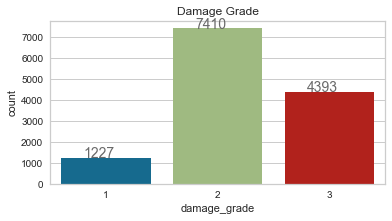

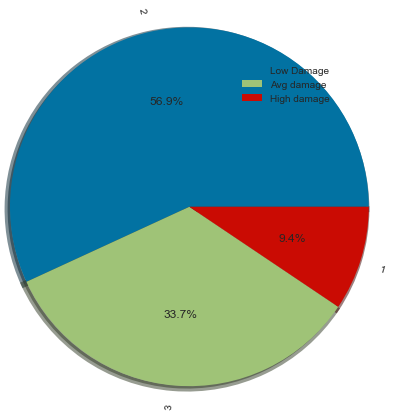

In [16]:
# checking the dependent variable --> `damage_grade`
plt.figure(figsize=(6,3))
ax=sns.countplot("damage_grade",data=DF_2)
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+0.2, i.get_height()+3, \
            str(round((i.get_height()), 2)), fontsize=14, color='dimgrey')
plt.title("Damage Grade")
plt.show()  
###############################################################
#                       pie plot                              #                                                            
###############################################################
DF_2["damage_grade"].dropna().astype(int).value_counts().plot.pie(autopct="%.1f%%", 
                                                    shadow=True,rotatelabels=True,
                                                    wedgeprops={'linewidth': 6},
                                                    radius=1.5
                                                    )
plt.legend(["Low Damage","Avg damage","High damage"])
plt.show()

OBSERVATIONS
1: represents low damage
2: represents a medium amount of damage
3: represents almost complete destruction
9.6% of bulidings were high damaged by earthquake.
57.1% of bulidings were low damaged
33.3% of bulidings were medium damaged due to earthquake.

For doing more exploratoy analysis and  drawing correaltion matrix i will  make two data frame first is target  which includes damage grade and other is  train. 

In [17]:
train_r = DF_2.drop(['damage_grade'],axis =1 ) 
target_r = DF_2[['damage_grade']]
target_r.shape
print(type(target_r))

<class 'pandas.core.frame.DataFrame'>


# List which features you will choose in this model. Write a brief statement: Is it required to consider the repeating features in the model? if independent variables are highly correlated. Select the required columns in the dataframe and drop the others

#To check the correlation  between  independent variable and  to perform feature selection which feature we want  to  keep and and what we can drop,first we need to encode categorical  column and then draw correlation matrix. there are many encoding technique such as ordinal , lebel , onehot encoder and effect and target , binary, hash, target etc. in this   one hot endoing  has been done using get_dummy encoding and to convert categorical column into numerical.

To plot a correlation matrix there can be two way draw a single plot for  categorical and numerical using only column in categorical value 1 or plot two diffrent  correlation matrix using Crammer's V for categorical and a for numerical  pearson and then selecting columns based on high multicollinerity.

In [18]:
cat_feats = ['land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position','legal_ownership_status',
       'plan_configuration']
df_3 = pd.get_dummies(train_r,columns=cat_feats,drop_first=True)


In [19]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13030 entries, 96204 to 105403
Data columns (total 61 columns):
 #   Column                                  Non-Null Count  Dtype
---  ------                                  --------------  -----
 0   building_id                             13030 non-null  int64
 1   geo_level_1_id                          13030 non-null  int64
 2   geo_level_2_id                          13030 non-null  int64
 3   geo_level_3_id                          13030 non-null  int64
 4   count_floors_pre_eq                     13030 non-null  int64
 5   age                                     13030 non-null  int64
 6   area_percentage                         13030 non-null  int64
 7   height_percentage                       13030 non-null  int64
 8   has_superstructure_adobe_mud            13030 non-null  int64
 9   has_superstructure_mud_mortar_stone     13030 non-null  int64
 10  has_superstructure_stone_flag           13030 non-null  int64
 11  has_supers

In [20]:
df_3.columns

Index(['building_id', 'geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id',
       'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage',
       'has_superstructure_adobe_mud', 'has_superstructure_mud_mortar_stone',
       'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'count_families', 'has_secondary_use', 'has_secondary_use_agriculture',
       'has_secondary_use_hotel', 'has_secondary_use_rental',
       'has_secondary_use_institution', 'has_secondary_use_school',
       'has_secondary_use_industry', 'has_secondary_use_health_post',
       'has_secondary_use_gov_office', 'has_secondary_use_use_police',
       'has_secondary_use_other', 'land_surface_condition_o

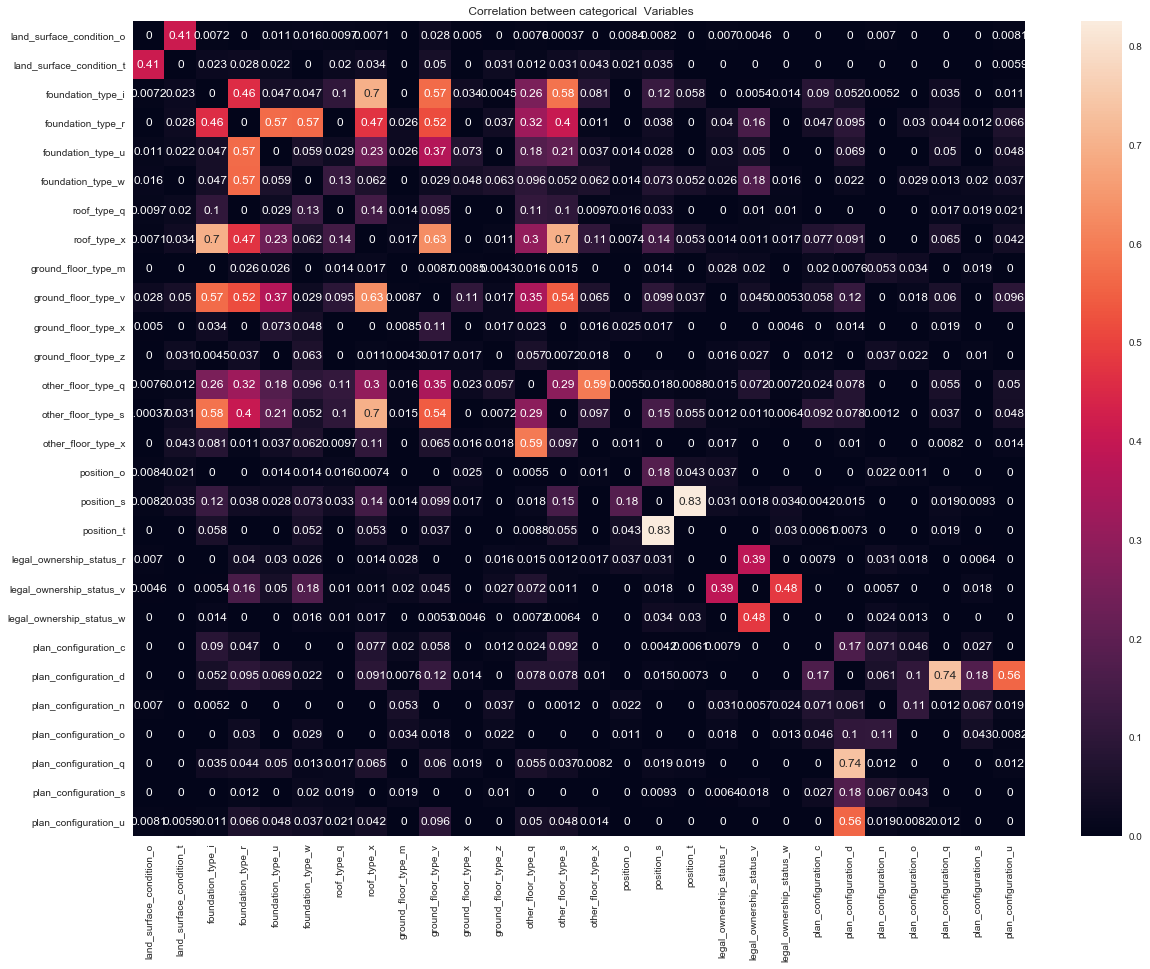

In [21]:
# correlation  between categorical values using Crammer's V  

import itertools
import scipy.stats as ss
def cramers_corrected_stat(confusion_matrix):
    
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min( (kcorr-1), (rcorr-1)))   
cols = ['land_surface_condition_o',
       'land_surface_condition_t', 'foundation_type_i', 'foundation_type_r',
       'foundation_type_u', 'foundation_type_w', 'roof_type_q', 'roof_type_x',
       'ground_floor_type_m', 'ground_floor_type_v', 'ground_floor_type_x',
       'ground_floor_type_z', 'other_floor_type_q', 'other_floor_type_s',
       'other_floor_type_x', 'position_o', 'position_s', 'position_t',
       'legal_ownership_status_r', 'legal_ownership_status_v',
       'legal_ownership_status_w', 'plan_configuration_c',
       'plan_configuration_d', 'plan_configuration_n', 'plan_configuration_o',
       'plan_configuration_q', 'plan_configuration_s', 'plan_configuration_u']
corrM = np.zeros((len(cols),len(cols)))
# there's probably a nice pandas way to do this
for col1, col2 in itertools.combinations(cols, 2):
    idx1, idx2 = cols.index(col1), cols.index(col2)
    corrM[idx1, idx2] = cramers_corrected_stat(pd.crosstab(df_3[col1], df_3[col2]))
    corrM[idx2, idx1] = corrM[idx1, idx2]
    corr = pd.DataFrame(corrM, index=cols, columns=cols)
fig, ax = plt.subplots(figsize=(20, 15))
ax = sns.heatmap(corr, annot=True, ax=ax); ax.set_title(" Correlation between categorical  Variables");

Any correlation grater than 0.5 is  called positive  correlation so here i am taking threshold value .7 they will be called positively multi collinear and will remove those feature.
observation: l) plan _configuration_q is realted to  plan _configuration_d.
2)position_t and positon_s  are  highly correlated. 
3)foudation type_ i and roof type_x realted to each other.
4)roof type_x and other_floor type _s  are related positively.
so we can remove atleast any of 4 variable from this data set on the basis of correalation matrix result.

In [22]:
#  draw correlation matrix of numerical value variable
num_corr  = df_3[['building_id', 'geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id',
       'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage',
       'has_superstructure_adobe_mud', 'has_superstructure_mud_mortar_stone',
       'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'count_families', 'has_secondary_use', 'has_secondary_use_agriculture',
       'has_secondary_use_hotel', 'has_secondary_use_rental',
       'has_secondary_use_institution', 'has_secondary_use_school',
       'has_secondary_use_industry', 'has_secondary_use_health_post',
       'has_secondary_use_gov_office', 'has_secondary_use_use_police',
       'has_secondary_use_other']]
corr_matrix=num_corr.corr()
print(corr_matrix)


                                        building_id  geo_level_1_id  \
building_id                                1.000000        0.009057   
geo_level_1_id                             0.009057        1.000000   
geo_level_2_id                             0.002955       -0.068463   
geo_level_3_id                            -0.000094        0.008510   
count_floors_pre_eq                        0.003304       -0.071989   
age                                       -0.014143       -0.028603   
area_percentage                           -0.012967        0.070802   
height_percentage                          0.007322       -0.044584   
has_superstructure_adobe_mud               0.005133       -0.018084   
has_superstructure_mud_mortar_stone        0.002926       -0.149532   
has_superstructure_stone_flag             -0.008030       -0.005180   
has_superstructure_cement_mortar_stone     0.005154        0.024941   
has_superstructure_mud_mortar_brick        0.006673       -0.031094   
has_su

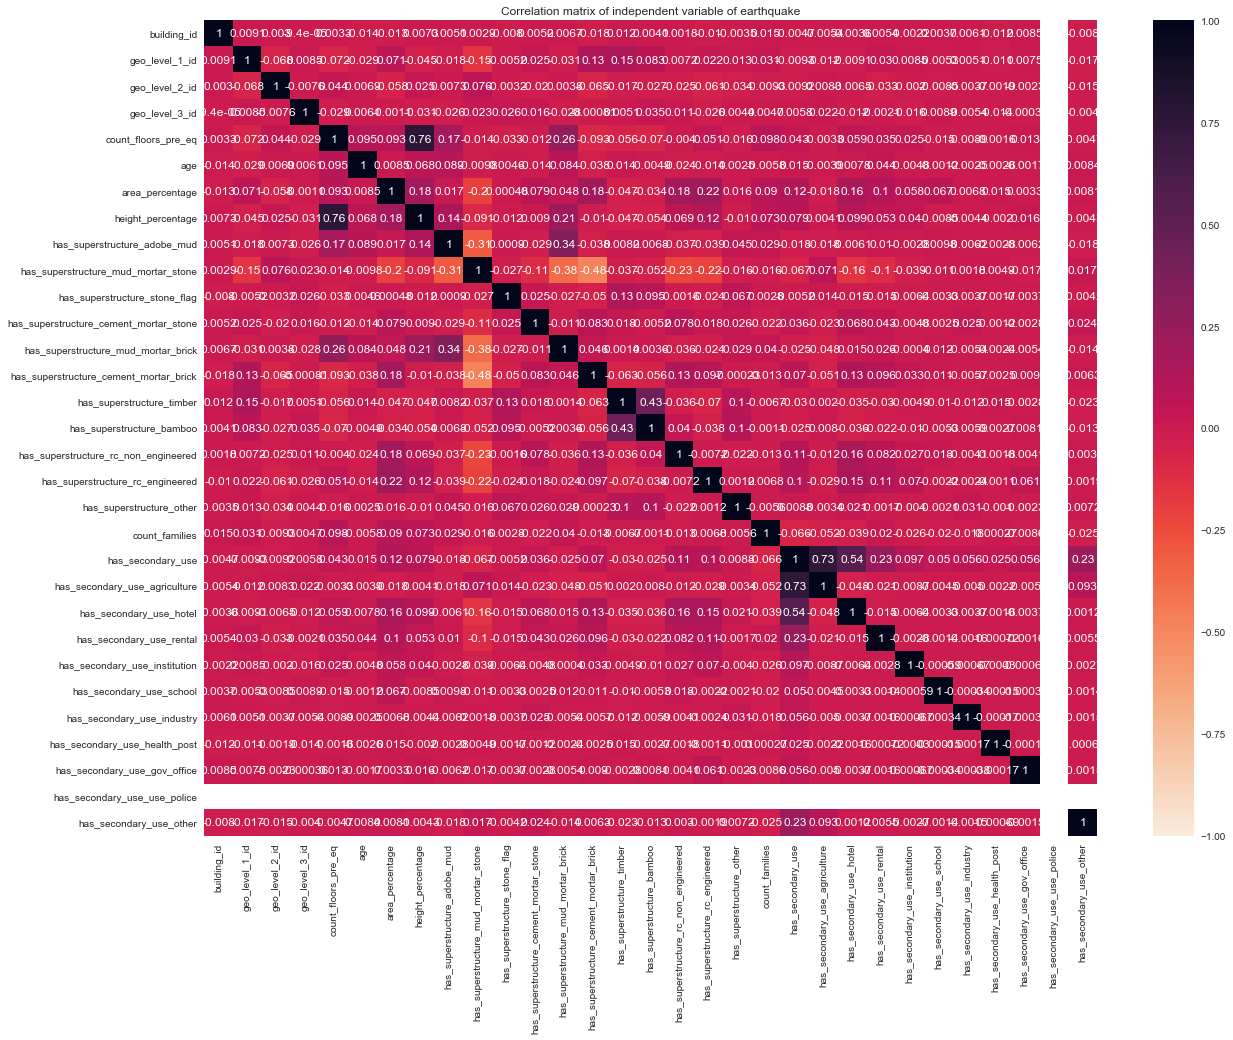

In [23]:
#plotting a correlation matrix
plt.figure(figsize=(20,15))
plt.title("Correlation matrix of independent variable of earthquake")
plt.xlabel("num_cor columns")
plt.ylabel(" num_corr columns")
sns.heatmap(num_corr.corr(), annot = True, vmin=-1, vmax=1, center= 0,cmap="rocket_r")



0bservation:1)count floors per sq ft is related to hight percentage.

2)has_secondary_use related to the has_secondary_use_agriculture.
3)has_secondary_use_gov_office, has_secondary_use_use_police are also not at all important in this data set so i will drop that  also.


# Feature selection

#it is important to drop repetitative columns and doing feature selection using feature selection techniques because of the folowing reasons. 
1)Reduces Overfitting: Less redundant data means less opportunity to make decisions based on noise.
2) Improves Accuracy: Less misleading data means modeling accuracy improves.
3)Reduces Training Time: fewer data points reduce algorithm complexity and algorithms train faster.

In [24]:
df_dummy = df_3[['has_superstructure_adobe_mud', 'has_superstructure_mud_mortar_stone',
       'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'count_families', 'has_secondary_use', 'has_secondary_use_agriculture',
       'has_secondary_use_hotel', 'has_secondary_use_rental',
       'has_secondary_use_institution', 'has_secondary_use_school',
       'has_secondary_use_industry', 'has_secondary_use_health_post',
       'has_secondary_use_gov_office', 'has_secondary_use_use_police',
       'has_secondary_use_other', 'land_surface_condition_o',
       'land_surface_condition_t', 'foundation_type_i', 'foundation_type_r',
       'foundation_type_u', 'foundation_type_w', 'roof_type_q', 'roof_type_x',
       'ground_floor_type_m', 'ground_floor_type_v', 'ground_floor_type_x',
       'ground_floor_type_z', 'other_floor_type_q', 'other_floor_type_s',
       'other_floor_type_x', 'position_o', 'position_s', 'position_t',
       'legal_ownership_status_r', 'legal_ownership_status_v',
       'legal_ownership_status_w', 'plan_configuration_c',
       'plan_configuration_d', 'plan_configuration_n', 'plan_configuration_o',
       'plan_configuration_q', 'plan_configuration_s', 'plan_configuration_u']]

from xgboost import plot_importance
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(df_dummy,target_r)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

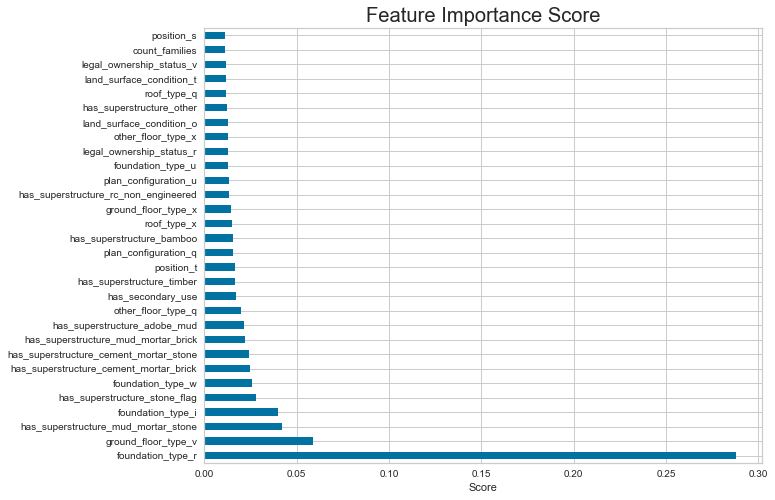

In [25]:
#Horizontal bar chart for feature Importance
feat_importances = pd.Series(model.feature_importances_,index= df_dummy.columns)
feat_importances = feat_importances.nlargest(30)
plt.figure(figsize=(10,8))
feat_importances.plot(kind='barh')
plt.style.use('fivethirtyeight')
plt.xlabel('Score')
plt.title('Feature Importance Score')
plt.show();

Based on my analysis i will keep foundation_type_i, ground_floor_type_v,and foundation_type_i and has_superstructure_cement_mortar_brick rest of the  features are having value less than .05 are not important. 

# FINAL DATA SET

In [26]:
# dropping all the unnecceary columns and making a one final data set for analysis.
df_new=df_3.drop(columns=['position_o', 'position_t', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered','count_floors_pre_eq', 'has_secondary_use', 'has_secondary_use_agriculture',
       'has_secondary_use_hotel', 'has_secondary_use_rental',
       'has_secondary_use_institution', 'has_secondary_use_school',
       'has_secondary_use_industry', 'has_secondary_use_health_post',
       'has_secondary_use_gov_office', 'has_secondary_use_use_police',
       'has_secondary_use_other', 'count_families', 'ground_floor_type_m', 'ground_floor_type_x',
       'ground_floor_type_z', 'other_floor_type_q', 'other_floor_type_s',
       'other_floor_type_x',
        'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
        'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other', 
     'foundation_type_u', 'foundation_type_w','has_superstructure_adobe_mud', 'has_superstructure_mud_mortar_stone',        
      'plan_configuration_d', 'plan_configuration_n', 'plan_configuration_o',
       'plan_configuration_q', 'plan_configuration_s',  'foundation_type_r',
        'legal_ownership_status_v',
       'legal_ownership_status_w', 'roof_type_x',
       'other_floor_type_q', 'land_surface_condition_o' ])

In [27]:
df_new.shape

(13030, 18)

In [28]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13030 entries, 96204 to 105403
Data columns (total 18 columns):
 #   Column                                  Non-Null Count  Dtype
---  ------                                  --------------  -----
 0   building_id                             13030 non-null  int64
 1   geo_level_1_id                          13030 non-null  int64
 2   geo_level_2_id                          13030 non-null  int64
 3   geo_level_3_id                          13030 non-null  int64
 4   age                                     13030 non-null  int64
 5   area_percentage                         13030 non-null  int64
 6   height_percentage                       13030 non-null  int64
 7   has_superstructure_cement_mortar_brick  13030 non-null  int64
 8   land_surface_condition_t                13030 non-null  uint8
 9   foundation_type_i                       13030 non-null  uint8
 10  roof_type_q                             13030 non-null  uint8
 11  ground_flo

In [29]:
 df_final =pd.concat([df_new, target_r], axis=1, sort=False)
 

In [30]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13030 entries, 96204 to 105403
Data columns (total 19 columns):
 #   Column                                  Non-Null Count  Dtype
---  ------                                  --------------  -----
 0   building_id                             13030 non-null  int64
 1   geo_level_1_id                          13030 non-null  int64
 2   geo_level_2_id                          13030 non-null  int64
 3   geo_level_3_id                          13030 non-null  int64
 4   age                                     13030 non-null  int64
 5   area_percentage                         13030 non-null  int64
 6   height_percentage                       13030 non-null  int64
 7   has_superstructure_cement_mortar_brick  13030 non-null  int64
 8   land_surface_condition_t                13030 non-null  uint8
 9   foundation_type_i                       13030 non-null  uint8
 10  roof_type_q                             13030 non-null  uint8
 11  ground_flo

# Convert percentage to value/100 (check which option gives better result, as-is or divided/100)

In [31]:
df_final['area_percentage'] = df_final['area_percentage'].div(100).round(2)
df_final['height_percentage'] = df_final['height_percentage'].div(100).round(2)

In [32]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13030 entries, 96204 to 105403
Data columns (total 19 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   building_id                             13030 non-null  int64  
 1   geo_level_1_id                          13030 non-null  int64  
 2   geo_level_2_id                          13030 non-null  int64  
 3   geo_level_3_id                          13030 non-null  int64  
 4   age                                     13030 non-null  int64  
 5   area_percentage                         13030 non-null  float64
 6   height_percentage                       13030 non-null  float64
 7   has_superstructure_cement_mortar_brick  13030 non-null  int64  
 8   land_surface_condition_t                13030 non-null  uint8  
 9   foundation_type_i                       13030 non-null  uint8  
 10  roof_type_q                             13030 non-nul

# Make an 80-20 stratified split based on the target variable(categorical variable)

In [33]:
X = df_final.drop(['damage_grade'],axis =1 )
Y = df_final['damage_grade']

In [34]:
#Stratified 80-20 train test split and keeping shuffle parameter true
X_train, X_test, y_train, y_test = train_test_split( X,Y,
                        shuffle = True, test_size=0.2, stratify =Y)

In [35]:
print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)

Train (10424, 18) (10424,)
Test (2606, 18) (2606,)


In [36]:
#checking the split
print(df_final['damage_grade'].value_counts()/len(df_final))


2    0.568688
3    0.337145
1    0.094167
Name: damage_grade, dtype: float64


In [37]:
X_train.info()
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10424 entries, 38663 to 177891
Data columns (total 18 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   building_id                             10424 non-null  int64  
 1   geo_level_1_id                          10424 non-null  int64  
 2   geo_level_2_id                          10424 non-null  int64  
 3   geo_level_3_id                          10424 non-null  int64  
 4   age                                     10424 non-null  int64  
 5   area_percentage                         10424 non-null  float64
 6   height_percentage                       10424 non-null  float64
 7   has_superstructure_cement_mortar_brick  10424 non-null  int64  
 8   land_surface_condition_t                10424 non-null  uint8  
 9   foundation_type_i                       10424 non-null  uint8  
 10  roof_type_q                             10424 non-nul

In [38]:

scaler = StandardScaler() 
# Fitting the numerical variables using StandardScaler on the train and test data
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns )
X_test =  pd.DataFrame(scaler.fit_transform(X_test), columns=X_test.columns )

X_train.shape

(10424, 18)

# Build a SVM Classifier, train the model

In [40]:
#Import libraries and building Linear SVR
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
!pip install yellowbrick
from sklearn import metrics
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import StratifiedKFold
from yellowbrick.model_selection import LearningCurve
# Building a linear SVR classifier Model with standard parameters

# Create the learning curve visualizer
kfold = StratifiedKFold(n_splits=12)
sizes = np.linspace(0.3, 1.0, 10)
svclassifier = SVC(kernel='linear',cv=kfold, scoring='f1_weighted', train_sizes=sizes, n_jobs=4)
# Fitting the Training data
svclassifier.fit(X_train, y_train)
svclassifier.show()  

TypeError: __init__() got an unexpected keyword argument 'cv'

In [ ]:
## Predicting the validation data using the linear SVR classifier Model
y_pred1 = svclassifier.predict(X_test)

print(confusion_matrix(y_test,y_pred1))
print(classification_report(y_test,y_pred1))

In [ ]:
#Polynomial Kernel
svclassifier = SVC(kernel='poly', degree=10)
svclassifier.fit(X_train, y_train)

In [ ]:
y_pred2 = svclassifier.predict(X_test)
print(confusion_matrix(y_test, y_pred2))
print(classification_report(y_test, y_pred2))

In [ ]:
#Sigmoid Kernel
svclassifier = SVC(kernel='sigmoid')
svclassifier.fit(X_train, y_train)
y_pred3 = svclassifier.predict(X_test)

In [ ]:
print(confusion_matrix(y_test, y_pred3))
print(classification_report(y_test, y_pred3))

In [ ]:
#Gaussian Kernel
svclassifier = SVC(kernel='rbf')
svclassifier.fit(X_train, y_train)

In [ ]:
y_pred4 = svclassifier.predict(X_test)
print(confusion_matrix(y_test, y_pred4))
print(classification_report(y_test, y_pred4))

# List the hyper-parameters that can be tuned in SVM Classifier. Explain the meaning of each hyper-parameter. Show the code along with comments on the parameter value chosen (use class presentation, discussion notes, some online reading) and why this value was chosen. Show the improvement you achieved in model accuracy.

kernel, gamma and C are the hyper parameter that can be tuned in svm.
kernel-we have various options available with kernel like, “linear”, “rbf”,”poly” and others (default value is “rbf”).  Here “rbf” and “poly” are useful for non-linear hyper-plane

gamma-Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’. Higher the value of gamma, will try to exact fit the as per training data set i.e. generalization error and cause over-fitting problem.

C: Penalty parameter C of the error term. It also controls the trade-off between smooth decision boundaries and classifying the training points correctly.

In [ ]:

from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import learning_curve
# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 
  
# fitting the model for grid search 
grid.fit(X_train, y_train)

In [ ]:
# print best parameter after tuning 
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_)

In [ ]:
grid_predictions = grid.predict(X_test) 
  
# print classification report 
print(classification_report(y_test, grid_predictions))

# Build a Decision Tree Classifier, train the model

The Decision tree complexity has a crucial effect on its accuracy and it is explicitly controlled by the stopping criteria used and the pruning method employed. Usually, the tree complexity is measured by one of the following metrics: the total number of nodes, total number of leaves, tree depth and number of attributes used [8]. max_depth, min_samples_split, and min_samples_leaf are all stopping criteria whereas min_weight_fraction_leaf and min_impurity_decrease are pruning methods.

In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred5 = clf.predict(X_test)

In [ ]:
# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred5))

# 2. List the hyper-parameters that can be tuned in Decision Tree model . Show the code along with comments on the parameter value chosen (use class presentation, discussion notes, some online reading) and why this value was chosen. Show the improvement you achieved in model accuracy.

Decision tree complexity has a crucial effect on its accuracy and it is explicitly controlled by the stopping criteria used and the pruning method employed. Usually, the tree complexity is measured by one of the following metrics or hyperparameter can be tuned in decision tree:
    
 the total number of nodes, total number of leaves, tree depth and number of attributes used. max_depth, min_samples_split, and min_samples_leaf are all stopping criteria whereas min_weight_fraction_leaf and min_impurity_decrease are pruning methods.
 
 The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.
 splitter: string, optional (default=”best”)
The strategy used to choose the split at each node. Supported strategies are “best” to choose the best split and “random” to choose the best random split.
max_depth: int or None, optional (default=None)
The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

Max_depth: int or None, optional (default=None)
The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

min_samples_leaf: int, float, optional (default=1)
The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression.
etc.

In [ ]:
#Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred6= clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred6))

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, verbose=1, cv=3)

grid_search_cv.fit(X_train, y_train)

In [ ]:
grid_search_cv.best_estimator_

In [ ]:
from sklearn.metrics import accuracy_score

y_pred7 = grid_search_cv.predict(X_test)
accuracy_score(y_test, y_pred7)

we built three model one is simple decison tree and one where i used entropy  max depths hyperparameter tuned to  3  and got accuracy improvement from roughly 56  to 61%.

after performing an gridsearch and getting the best parameter to tune   i run an new model  with best parameter and got the accuracy  of 66% . 

# Compare the Model Evaluation metric of which model performed better along with reason why you consider so.

Two model has been build one is svm classifier and one is decision tree classifier .
svem classifier running linear svm to kervel svm  i could not get the  accuracy improvemt more than 59 % and  even after using gridsearch and using best parameter. i could not get accuracy more than 58%.

in decison tree after tuning hyperarameter i got accuracy score 66% which shows on our data set dcision tree classifier performing well. one reason for  improved result may be  that our data set we have many binary values that why decision tree performance is better.

I will choose decision tree over Svm classifierfor this data set analysis  if i have to choose one .


# Optional: Submit your predictions to the contest(require the run on whole dataset). You will get a submission score. Use any other models of your choice discusssed in the class and check if you get improved result. Show it here.

In [ ]:
# just out of curosity:
#Random forest classifier
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

# prediction on test set
y_pred8=clf.predict(X_test)


# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred8))


In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=42), n_estimators=500,
    max_samples=100, bootstrap=True, random_state=42)
bag_clf.fit(X_train, y_train)
y_pred9 = bag_clf.predict(X_test)

In [ ]:
print(accuracy_score(y_test, y_pred9))

# ensembles

In [ ]:

params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, verbose=1, cv=3)
clf=RandomForestClassifier(n_estimators=100)
svclassifier = SVC(kernel='linear')

In [ ]:
for clf in (grid_search_cv,svclassifier,clf):
    clf.fit(X_train, y_train)
    y_pred9 = clf.predict(X_test)
    print("Accuracy:",metrics.accuracy_score(y_test, y_pred9))

in ensenble model  ramdom forest accuracy got increase from 66 to 67%.